### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [4]:
ingresoTotalT1 = tienda["Precio"].sum()
ingresoTotalT2 = tienda2["Precio"].sum()
ingresoTotalT3 = tienda3["Precio"].sum()
ingresoTotalT4 = tienda4["Precio"].sum()

In [5]:
print(f"El ingreso Total de la Tienda 1 es : S/.{ingresoTotalT1}")
print(f"El ingreso Total de la Tienda 2 es : S/.{ingresoTotalT2}")
print(f"El ingreso Total de la Tienda 3 es : S/.{ingresoTotalT3}")
print(f"El ingreso Total de la Tienda 4 es : S/.{ingresoTotalT4}")

El ingreso Total de la Tienda 1 es : S/.1150880400.0
El ingreso Total de la Tienda 2 es : S/.1116343500.0
El ingreso Total de la Tienda 3 es : S/.1098019600.0
El ingreso Total de la Tienda 4 es : S/.1038375700.0


# 2. Ventas por categoría

In [85]:
ingresoCategoriaT1 =tienda.groupby("Categoría del Producto")["Precio"].sum()
ingresoCategoriaT2 =tienda2.groupby("Categoría del Producto")["Precio"].sum()
ingresoCategoriaT3 =tienda3.groupby("Categoría del Producto")["Precio"].sum()
ingresoCategoriaT4 =tienda4.groupby("Categoría del Producto")["Precio"].sum()
cantCategoriasT1 = tienda["Categoría del Producto"].value_counts(ascending=False)
cantCategoriasT2 = tienda2["Categoría del Producto"].value_counts(ascending=False)
cantCategoriasT3 = tienda3["Categoría del Producto"].value_counts(ascending=False)
cantCategoriasT4 = tienda4["Categoría del Producto"].value_counts(ascending=False)

precio_Cantidad_T1 = pd.concat([cantCategoriasT1,ingresoCategoriaT1],axis=1)
precio_Cantidad_T1.columns = ("Cantidad de Productos","Ingreso Por Categoria")
precio_Cantidad_T2 = pd.concat([cantCategoriasT2,ingresoCategoriaT2],axis=1)
precio_Cantidad_T2.columns = ("Cantidad de Productos","Ingreso Por Categoria")
precio_Cantidad_T3 = pd.concat([cantCategoriasT3,ingresoCategoriaT3],axis=1)
precio_Cantidad_T3.columns = ("Cantidad de Productos","Ingreso Por Categoria")
precio_Cantidad_T4 = pd.concat([cantCategoriasT4,ingresoCategoriaT4],axis=1)
precio_Cantidad_T4.columns = ("Cantidad de Productos","Ingreso Por Categoria")

In [87]:
print(precio_Cantidad_T1)
print("************************************************************************")
print(precio_Cantidad_T2)
print("************************************************************************")
print(precio_Cantidad_T3)
print("************************************************************************")
print(precio_Cantidad_T4)

                         Cantidad de Productos  Ingreso Por Categoria
Categoría del Producto                                               
Muebles                                    465            187633700.0
Electrónicos                               448            429493500.0
Juguetes                                   324             17995700.0
Electrodomésticos                          312            363685200.0
Deportes y diversión                       284             39290000.0
Instrumentos musicales                     182             91299000.0
Libros                                     173              8784900.0
Artículos para el hogar                    171             12698400.0
************************************************************************
                         Cantidad de Productos  Ingreso Por Categoria
Categoría del Producto                                               
Muebles                                    442            176426300.0
Electrónicos     

In [39]:
Categorias_Mas_Populares = pd.concat([cantCategoriasT1,cantCategoriasT2,cantCategoriasT3,cantCategoriasT4],axis=1).head(3)
Categorias_Mas_Populares.columns = ("Tienda1","Tienda2","Tienda3","Tienda4")
Categorias_Mas_Populares.loc["Total"] = Categorias_Mas_Populares.sum()
Categorias_Mas_Populares

,Tienda1,Tienda2,Tienda3,Tienda4
Categoría del Producto,,,,
Muebles,465,442,499,480
Electrónicos,448,422,451,451
Juguetes,324,313,315,338
Total,1237,1177,1265,1269


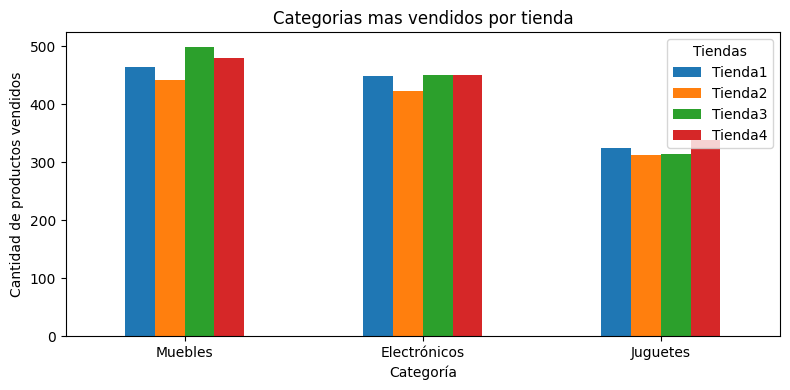

In [71]:
import matplotlib.pyplot as plt

# Excluimos la fila 'Total' para graficar solo las categorías
masPopulares = Categorias_Mas_Populares.drop("Total")

# Gráfico de barras agrupadas
masPopulares.plot(kind="bar", figsize=(8,4))
plt.title("Categorias mas vendidos por tienda")
plt.ylabel("Cantidad de productos vendidos")
plt.xlabel("Categoría")
plt.xticks(rotation=0)
plt.legend(title="Tiendas")
plt.tight_layout()
plt.show()

In [70]:
Categorias_Menos_Populares = pd.concat([cantCategoriasT1,cantCategoriasT2,cantCategoriasT3,cantCategoriasT4],axis=1).tail(3)
Categorias_Menos_Populares.columns = ("Tienda1","Tienda2","Tienda3","Tienda4",)
Categorias_Menos_Populares.loc["Total"] = Categorias_Menos_Populares.sum()
Categorias_Menos_Populares

,Tienda1,Tienda2,Tienda3,Tienda4
Categoría del Producto,,,,
Instrumentos musicales,182,224,177,170
Libros,173,197,185,187
Artículos para el hogar,171,181,177,201
Total,526,602,539,558


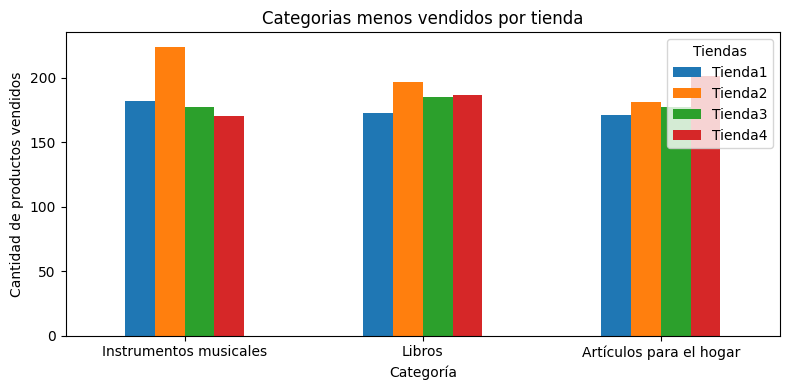

In [69]:
import matplotlib.pyplot as plt

# Excluimos la fila 'Total' para graficar solo las categorías
menosPopulares = Categorias_Menos_Populares.drop("Total")

# Gráfico de barras agrupadas
menosPopulares.plot(kind="bar", figsize=(8,4))
plt.title("Categorias menos vendidos por tienda")
plt.ylabel("Cantidad de productos vendidos")
plt.xlabel("Categoría")
plt.xticks(rotation=0)
plt.legend(title="Tiendas")
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [25]:
calificacion_Promedio_T1 =round(tienda["Calificación"].sum()/tienda["Calificación"].count(),2)
calificacion_Promedio_T2 =round(tienda["Calificación"].sum()/tienda2["Calificación"].count(),2)
calificacion_Promedio_T3 =round(tienda["Calificación"].sum()/tienda3["Calificación"].count(),2)
calificacion_Promedio_T4 =round(tienda["Calificación"].sum()/tienda4["Calificación"].count(),2)
Calificacion = {"Tienda1" :calificacion_Promedio_T1,"Tienda2" :calificacion_Promedio_T2,"Tienda3" :calificacion_Promedio_T3,"Tienda4" :calificacion_Promedio_T4}
Calificacion

{'Tienda1': np.float64(3.98),
 'Tienda2': np.float64(3.98),
 'Tienda3': np.float64(3.98),
 'Tienda4': np.float64(3.98)}

# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda